<a href="https://colab.research.google.com/github/Harsha194/Albert/blob/main/dementia_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-2f1966dc2946>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Last_Visit'] = df2.groupby('Subject ID')['Visit'].transform('max')
<ipython-input-1-2f1966dc2946>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('Last_Visit', axis=1, inplace=True)


Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'Gender', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')


<ipython-input-1-2f1966dc2946>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Group', palette='Set2').set(title='Dementia Group')


<Axes: xlabel='MMSE', ylabel='CDR'>

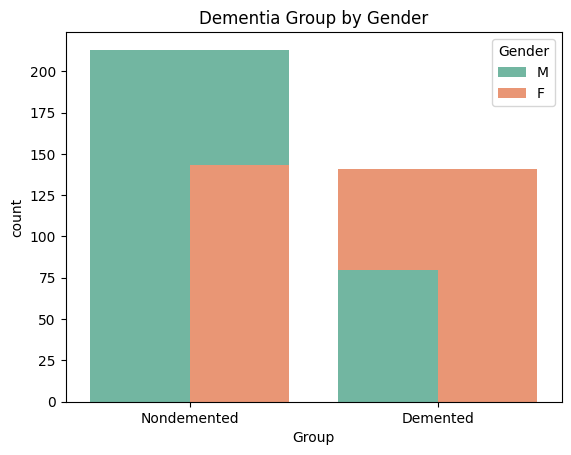

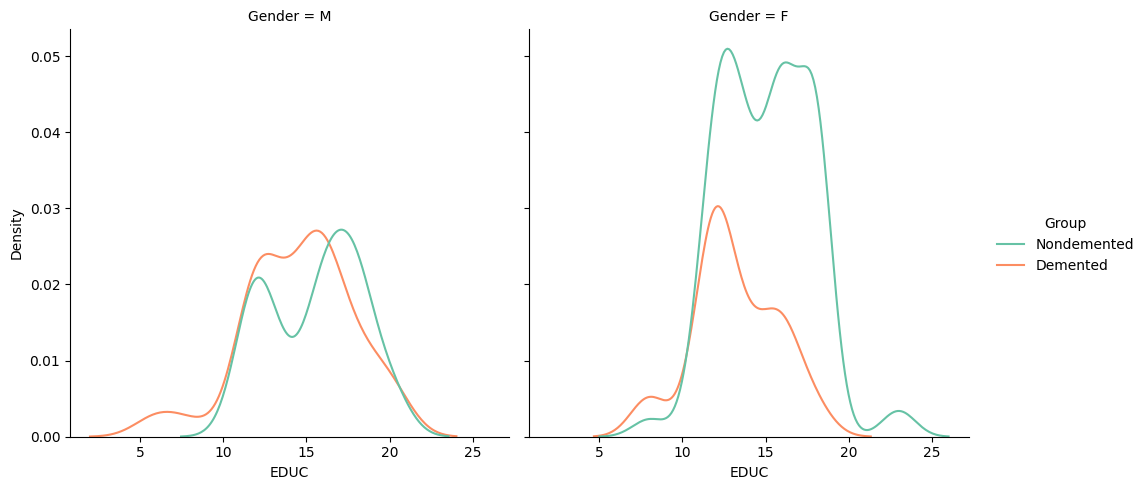

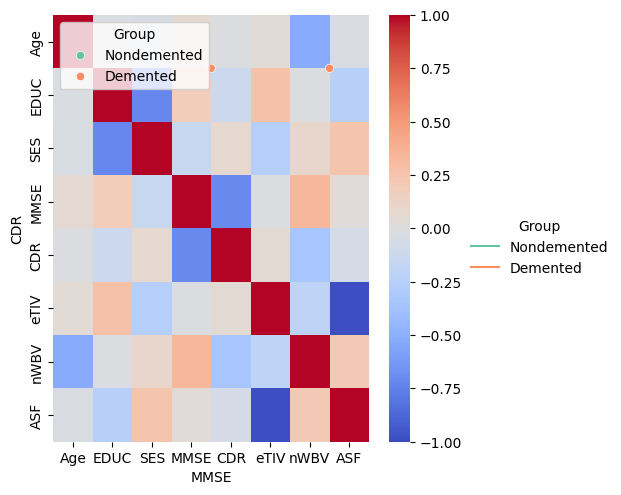

In [1]:
import pandas as pd

data = pd.read_csv("dementia_dataset.csv")
data.isnull().sum()
data.dropna(inplace=True)

import matplotlib.pyplot as plt
import sklearn as sk

data.head(10)
data['Group'].unique()

df2 = data.loc[data['Group'] == 'Converted']
data = data.drop(df2.index)

df2.head(10)
df2['Last_Visit'] = df2.groupby('Subject ID')['Visit'].transform('max')
df2.loc[df2['Visit'] < df2['Last_Visit'], 'Group'] = 'Nondemented'
df2.loc[df2['Visit'] == df2['Last_Visit'], 'Group'] = 'Demented'
df2.drop('Last_Visit', axis=1, inplace=True)
df2.head(5)

frames = [data, df2]
df = pd.concat(frames)

df['Group'].unique()
df.rename(columns={'M/F': 'Gender'}, inplace=True)

print(df.columns)

# Drop unnecessary columns from the DataFrame if they exist
columns_to_drop = ['Subject ID', 'MRI ID', 'Hand', 'Visit', 'MR Delay']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns_to_drop, inplace=True)

import seaborn as sns

sns.countplot(data=df, x='Group', palette='Set2').set(title='Dementia Group')
sns.countplot(data=df, x='Group', palette='Set2', hue='Gender').set(title='Dementia Group by Gender')
sns.displot(data=df, x='EDUC', col='Gender', palette='Set2', hue='Group', kind='kde')
sns.displot(data=df, x='Age', hue='Group', kind="kde", palette='Set2')
sns.heatmap(df.corr(numeric_only=True), vmin=-1, cmap='coolwarm')
sns.scatterplot(data=df, x='MMSE', y='CDR', palette='Set2', hue='Group')
